# [Lab Session 2](otsu.ipynb)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

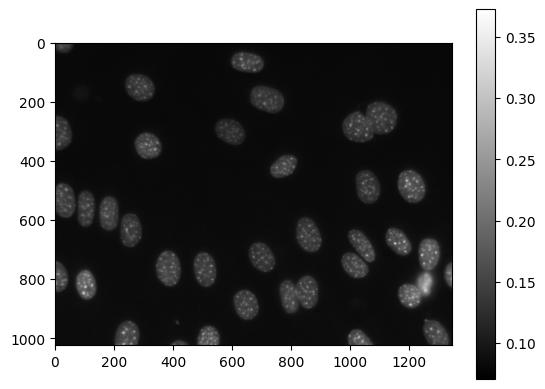

In [58]:
imgf = plt.imread("/workspaces/Lutz-tries-to-code/data/NIH3T3/im/dna-0.png")
plt.imshow(imgf, cmap="grey")
plt.colorbar()

**[Task 1.2.]()** Quantify the image into 256 bins:

In [59]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [60]:
h = np.zeros(256, dtype = int)
for i in range(256):
    h[i] = np.sum(img8 == i)

Show the computed histogram:

<BarContainer object of 256 artists>

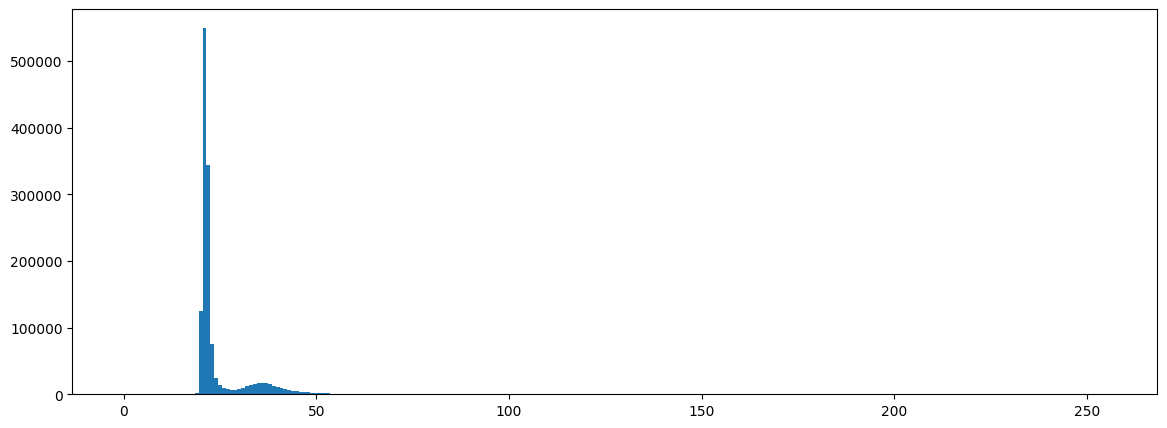

In [61]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [62]:
def otsu_thresholding(img8,histogram):
    all_pixels = img8.size
    min_variance = float("inf")
    T_opt = 0

    for T in range(0,256):
        n1 = np.sum(h[:T])
        n2 = np.sum(h[T:])

        if n1 == 0 or n2 == 0:
            continue
    
        mean1 = np.sum([i * h[i] for i in range(0,T)]) / n1
        mean2 = np.sum([i * h[i] for i in range(T, 256)]) / n2

        var1 = np.sum([((i - mean1)**2)*h[i] for i in range(0,T)]) /n1    # Varianz hoffe ich... (klasse1)
        var2 = np.sum([((i - mean2)**2)*h[i] for i in range(T,256)]) /n2 # auch die Varianz hoffe ich (Klasse 2)

    # nu hoffenltich beide varianzen zusammen im ganzen aber hoenstly kein plan...
        within_class_variance = n1 * var1 + n2 * var2 # alter hilfe was ist das alles nur:((

        if within_class_variance < min_variance:
            min_variance = within_class_variance
            T_opt = T
    return T_opt

optimal_threshold = otsu_thresholding(img,h)
print(optimal_threshold)

31


**[Task 1.5.]()** Perform Otsu thresholding:

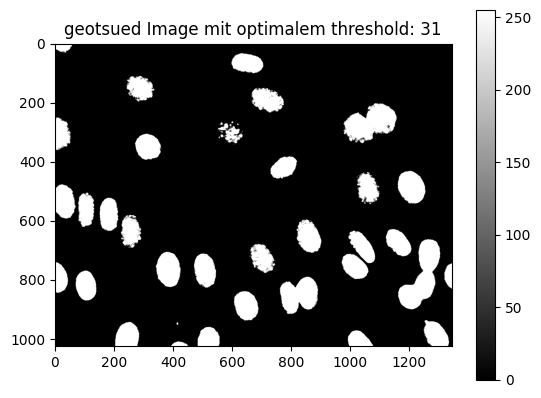

In [ ]:
img_otsu = np.zeros_like(img8)

threshold = otsu_thresholding(img8,h)

for i in range(img8.shape[0]):
    for j in range(img8.shape[1]):
        if img8[i,j]>threshold:
            img_otsu[i,j]=255
        else:
            img_otsu[i,j]=0

plt.imshow(img_otsu, cmap="grey")
plt.title(f"geotsued Image mit optimalem threshold: {optimal_threshold}")
plt.colorbar()
plt.show()

**[Task 1.6.]()** Compute the Dice coefficient:

In [64]:
gt_img0 = plt.imread("/workspaces/Lutz-tries-to-code/data/NIH3T3/gt/0.png")
img_otsu = img_otsu // 255


DC = (2*(np.sum(img_otsu*gt_img0))/(np.sum(img_otsu)+np.sum(gt_img0)))

print(DC)

0.8701113873987207
